In [1]:
import os
import math
import numpy as np
from matplotlib import pyplot as plt
import time
import torch
from statsmodels.multivariate.cancorr import CanCorr

/home/mrim/quenot/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def pltscale(scale):
    if scale == 'log':
        plt.xscale('log', base=2)
    else:
        plt.xscale('linear')

def tpca(a, q=65536):
    t0 = time.time()
    a = torch.tensor(a)
    m = a.mean(axis = 0)
    u, s, v = torch.pca_lowrank(a, q=min(a.size(1), q), center=True)
    print(time.time()-t0)
    return m.numpy(), u.numpy(), s.numpy(), v.numpy()

In [4]:
testDir = "/home/mrim/quenot/irim/pytorch/dual_encoding_experiments/VisualSearchResults/msrvtt10k/test_results"

def loadEmbs(testDir, expName, runNum, embsName="embs.pth"):
    runDir = os.path.join(testDir, expName, "runs_%d/model_best" % runNum)
    embs = torch.load(os.path.join(runDir, embsName))
    return embs

def getCapVid(testDir, expName, runNum, embsName="embs.pth",space="latent"):
    runDir = os.path.join(testDir, expName, "runs_%d/model_best" % runNum)
    embs = torch.load(os.path.join(runDir, embsName))
    if space == "latent":
        capvid = np.concatenate((embs['cap_embs'], embs['video_embs']))
    else:
        capvid = np.concatenate((embs['cap_tag_scores'], embs['video_tag_scores']))
    return(np.matmul(capvid,tpca(capvid)[3]))

6.186803102493286
6.229138135910034
6.490396499633789
6.047264575958252
6.9381794929504395
6.378594160079956
7.131132125854492
6.6773598194122314


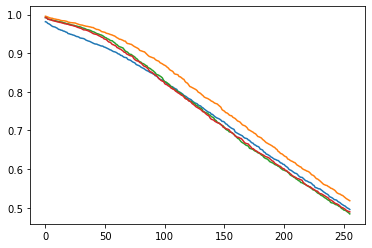

In [21]:
# l0 = getCapVid(testDir, "latent_512_cxd",  0, embsName="embs.pth", space="latent")
# l1 = getCapVid(testDir, "latent_512_cxd", 10, embsName="embs.pth", space="latent")
l2 = getCapVid(testDir, "hybrid_512_512_nocl_xi_cos_dp", 0, embsName="embs_fuse.pth", space="latent")
l3 = getCapVid(testDir, "hybrid_512_512_nocl_xi_cos_dp", 0, embsName="embs_fuse.pth", space="concept")
l4 = getCapVid(testDir, "hybrid_512_512_nocl_xi_cos_dp", 0, embsName="embs.pth", space="latent")
l5 = getCapVid(testDir, "hybrid_512_512_nocl_xi_cos_dp", 0, embsName="embs.pth", space="concept")
l6 = getCapVid(testDir, "hybrid_512_512_nocl_xi", 0, embsName="embs.pth", space="latent")
l7 = getCapVid(testDir, "hybrid_512_512_nocl_xi", 0, embsName="embs.pth", space="concept")
l8 = getCapVid(testDir, "hybrid_512_512_xi", 0, embsName="embs.pth", space="latent")
l9 = getCapVid(testDir, "hybrid_512_512_xi", 0, embsName="embs.pth", space="concept")
# cc0 = CanCorr(l0,l1)
cc1 = CanCorr(l2,l3)
cc2 = CanCorr(l4,l5)
cc3 = CanCorr(l6,l7)
cc4 = CanCorr(l8,l9)


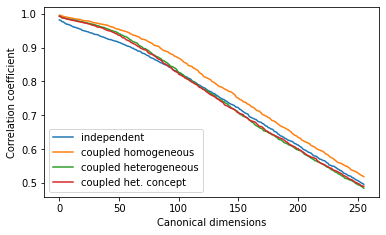

0.757
0.789
0.758
0.758


In [40]:
scale = 'linear'
offset = 0
plt.figure(figsize=(6, 3.5))
pltscale(scale)
# plt.plot(range(offset,cc0.cancorr.size+offset),cc0.cancorr)
plt.xlabel('Canonical dimensions')
plt.ylabel('Correlation coefficient')
plt.plot(range(256),cc1.cancorr[:256], label="independent")
plt.plot(range(256),cc2.cancorr[:256], label="coupled homogeneous")
plt.plot(range(256),cc3.cancorr[:256], label="coupled heterogeneous")
plt.plot(range(256),cc4.cancorr[:256], label="coupled het. concept")
plt.legend(loc='lower left')
plt.savefig("CCA.pdf", format="pdf", bbox_inches="tight")
plt.show()
print("%5.3f" % np.average(cc1.cancorr[:256]))
print("%5.3f" % np.average(cc2.cancorr[:256]))
print("%5.3f" % np.average(cc3.cancorr[:256]))
print("%5.3f" % np.average(cc4.cancorr[:256]))

In [5]:
vc, pvc = [], []
for n in range(2):
    embs = loadEmbs(testDir, "latent_2048_pca", n)
    capvid = embs['cap_embs']
    for i in range(1):
        capvid = np.concatenate((capvid, embs['video_embs']))
    vc.append(capvid)
    pvc.append(np.matmul(capvid,tpca(capvid)[3]))

print(vc[0].shape)

29.76877236366272
28.728710889816284
(62790, 2048)


In [6]:
embs = loadEmbs(testDir, "latent_2048_jac", 0)
capvid = embs['cap_embs']
for i in range(1):
    capvid = np.concatenate((capvid, embs['video_embs']))
vc.append(capvid)
pvc.append(np.matmul(capvid,tpca(capvid)[3]))

30.668571949005127


In [7]:
embs = loadEmbs(testDir, "concept_512", 0)
capvid = embs['cap_tag_scores']
for i in range(1):
    capvid = np.concatenate((capvid, embs['video_tag_scores']))
vc.append(capvid)
pvc.append(np.matmul(capvid,tpca(capvid)[3]))

5.704102516174316


In [8]:
embs = loadEmbs(testDir, "latent", 512)
capvid = embs['cap_embs']
for i in range(1):
    capvid = np.concatenate((capvid, embs['video_embs']))
vc.append(capvid)
pvc.append(np.matmul(capvid,tpca(capvid)[3]))

5.837640285491943


In [9]:
embs = loadEmbs(testDir, "latent_512_jxd", 0)
capvid = embs['cap_embs']
for i in range(1):
    capvid = np.concatenate((capvid, embs['video_embs']))
vc.append(capvid)
pvc.append(np.matmul(capvid,tpca(capvid)[3]))

6.2751030921936035


In [10]:
embs = loadEmbs(testDir, "latent", 128)
capvid = embs['cap_embs']
for i in range(1):
    capvid = np.concatenate((capvid, embs['video_embs']))
vc.append(capvid)
pvc.append(np.matmul(capvid,tpca(capvid)[3]))

0.558279275894165


45.730928897857666
6.426319599151611
32.633793354034424
5.799855947494507
41.55577087402344
6.786390066146851


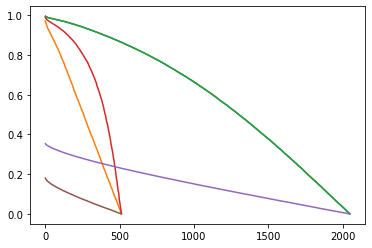

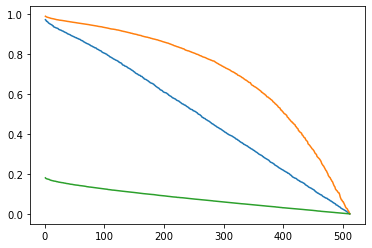

In [11]:
from statsmodels.multivariate.cancorr import CanCorr
t0 = time.time()
cc1 = CanCorr(vc[0], vc[1])
print(time.time()-t0)
t0 = time.time()
cc2 = CanCorr(vc[0][:,:512], vc[1][:,:512])
print(time.time()-t0)
t0 = time.time()
cc3 = CanCorr(pvc[0], pvc[1])
print(time.time()-t0)
t0 = time.time()
cc4 = CanCorr(pvc[0][:,:512], pvc[1][:,:512])
print(time.time()-t0)
t0 = time.time()
cc5 = CanCorr(np.random.rand(62790, 2048), np.random.rand(62790, 2048))
print(time.time()-t0)
t0 = time.time()
cc6 = CanCorr(np.random.rand(62790, 512), np.random.rand(62790, 512))
print(time.time()-t0)
# print(cc1.x_cancoef.shape)
# print(cc1.y_cancoef.shape)
# print(cc.cancorr)
scale = 'linear'
pltscale(scale)
plt.plot(range(1,cc1.cancorr.size+1),cc1.cancorr)
plt.plot(range(1,cc2.cancorr.size+1),cc2.cancorr)
plt.plot(range(1,cc3.cancorr.size+1),cc3.cancorr)
plt.plot(range(1,cc4.cancorr.size+1),cc4.cancorr)
plt.plot(range(1,cc5.cancorr.size+1),cc5.cancorr)
plt.plot(range(1,cc6.cancorr.size+1),cc6.cancorr)
plt.show()
pltscale(scale)
plt.plot(range(1,cc2.cancorr.size+1),cc2.cancorr)
plt.plot(range(1,cc4.cancorr.size+1),cc4.cancorr)
plt.plot(range(1,cc6.cancorr.size+1),cc6.cancorr)
plt.show()

In [ ]:
from statsmodels.multivariate.cancorr import CanCorr
t0 = time.time()
cc1 = CanCorr(vc[0], vc[1])
print(time.time()-t0)
t0 = time.time()
cc2 = CanCorr(vc[0][:,:512], vc[1][:,:512])
print(time.time()-t0)
t0 = time.time()
cc3 = CanCorr(pvc[0], pvc[1])
print(time.time()-t0)
t0 = time.time()
cc4 = CanCorr(pvc[0][:,:512], pvc[1][:,:512])
print(time.time()-t0)
t0 = time.time()
cc5 = CanCorr(np.random.rand(62790, 2048), np.random.rand(62790, 2048))
print(time.time()-t0)
t0 = time.time()
cc6 = CanCorr(np.random.rand(62790, 512), np.random.rand(62790, 512))
print(time.time()-t0)
# print(cc1.x_cancoef.shape)
# print(cc1.y_cancoef.shape)
# print(cc.cancorr)
scale = 'linear'
pltscale(scale)
plt.plot(range(1,cc1.cancorr.size+1),cc1.cancorr)
plt.plot(range(1,cc2.cancorr.size+1),cc2.cancorr)
plt.plot(range(1,cc3.cancorr.size+1),cc3.cancorr)
plt.plot(range(1,cc4.cancorr.size+1),cc4.cancorr)
plt.plot(range(1,cc5.cancorr.size+1),cc5.cancorr)
plt.plot(range(1,cc6.cancorr.size+1),cc6.cancorr)
plt.show()
pltscale(scale)
plt.plot(range(1,cc2.cancorr.size+1),cc2.cancorr)
plt.plot(range(1,cc4.cancorr.size+1),cc4.cancorr)
plt.plot(range(1,cc6.cancorr.size+1),cc6.cancorr)
plt.show()

In [ ]:
from statsmodels.multivariate.cancorr import CanCorr
t0 = time.time()
cc1 = CanCorr(vc[0], vc[1])
print(time.time()-t0)
t0 = time.time()
cc2 = CanCorr(vc[0][:,:512], vc[1][:,:512])
print(time.time()-t0)
t0 = time.time()
cc3 = CanCorr(pvc[0], pvc[1])
print(time.time()-t0)
t0 = time.time()
cc4 = CanCorr(pvc[0][:,:512], pvc[1][:,:512])
print(time.time()-t0)
t0 = time.time()
cc5 = CanCorr(np.random.rand(62790, 2048), np.random.rand(62790, 2048))
print(time.time()-t0)
t0 = time.time()
cc6 = CanCorr(np.random.rand(62790, 512), np.random.rand(62790, 512))
print(time.time()-t0)
# print(cc1.x_cancoef.shape)
# print(cc1.y_cancoef.shape)
# print(cc.cancorr)
scale = 'linear'
pltscale(scale)
plt.plot(range(1,cc1.cancorr.size+1),cc1.cancorr)
plt.plot(range(1,cc2.cancorr.size+1),cc2.cancorr)
plt.plot(range(1,cc3.cancorr.size+1),cc3.cancorr)
plt.plot(range(1,cc4.cancorr.size+1),cc4.cancorr)
plt.plot(range(1,cc5.cancorr.size+1),cc5.cancorr)
plt.plot(range(1,cc6.cancorr.size+1),cc6.cancorr)
plt.show()
pltscale(scale)
plt.plot(range(1,cc2.cancorr.size+1),cc2.cancorr)
plt.plot(range(1,cc4.cancorr.size+1),cc4.cancorr)
plt.plot(range(1,cc6.cancorr.size+1),cc6.cancorr)
plt.show()

In [ ]:
from statsmodels.multivariate.cancorr import CanCorr
t0 = time.time()
cc1 = CanCorr(vc[0], vc[1])
print(time.time()-t0)
t0 = time.time()
cc2 = CanCorr(vc[0][:,:512], vc[1][:,:512])
print(time.time()-t0)
t0 = time.time()
cc3 = CanCorr(pvc[0], pvc[1])
print(time.time()-t0)
t0 = time.time()
cc4 = CanCorr(pvc[0][:,:512], pvc[1][:,:512])
print(time.time()-t0)
t0 = time.time()
cc5 = CanCorr(np.random.rand(62790, 2048), np.random.rand(62790, 2048))
print(time.time()-t0)
t0 = time.time()
cc6 = CanCorr(np.random.rand(62790, 512), np.random.rand(62790, 512))
print(time.time()-t0)
t0 = time.time()
cc7 = CanCorr(vc[0], pvc[1])
print(time.time()-t0)
t0 = time.time()
cc8 = CanCorr(pvc[0], vc[1])
print(time.time()-t0)
# print(cc1.x_cancoef.shape)
# print(cc1.y_cancoef.shape)
# print(cc.cancorr)
scale = 'linear'
pltscale(scale)
plt.plot(range(1,cc1.cancorr.size+1),cc1.cancorr)
plt.plot(range(1,cc2.cancorr.size+1),cc2.cancorr)
plt.plot(range(1,cc3.cancorr.size+1),cc3.cancorr)
plt.plot(range(1,cc4.cancorr.size+1),cc4.cancorr)
plt.plot(range(1,cc5.cancorr.size+1),cc5.cancorr)
plt.plot(range(1,cc6.cancorr.size+1),cc6.cancorr)
plt.plot(range(1,cc7.cancorr.size+1),cc7.cancorr)
plt.plot(range(1,cc8.cancorr.size+1),cc8.cancorr)
plt.show()
pltscale(scale)
plt.plot(range(1,cc2.cancorr.size+1),cc2.cancorr)
plt.plot(range(1,cc4.cancorr.size+1),cc4.cancorr)
plt.plot(range(1,cc6.cancorr.size+1),cc6.cancorr)
plt.show()

In [ ]:
t0 = time.time()
cc7 = CanCorr(vc[0], pvc[1])
print(time.time()-t0)
t0 = time.time()
cc8 = CanCorr(pvc[0], vc[1])
print(time.time()-t0)
pltscale(scale)
plt.plot(range(1,cc1.cancorr.size+1),cc1.cancorr)
plt.plot(range(1,cc3.cancorr.size+1),cc3.cancorr)
plt.plot(range(1,cc7.cancorr.size+1),cc7.cancorr)
plt.plot(range(1,cc8.cancorr.size+1),cc8.cancorr)
plt.show()

In [ ]:
print(np.average(cc1.cancorr))
print(np.average(cc2.cancorr))
print(np.average(cc3.cancorr))
print(np.average(cc4.cancorr))
print(np.average(cc5.cancorr))
print(np.average(cc6.cancorr))
print(np.average(cc7.cancorr))
print(np.average(cc8.cancorr))

In [ ]:
for n in range(1, 12):
    cc = CanCorr(pvc[0][:,:2**n], pvc[1][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

In [ ]:
for n in range(1, 12):
    cc = CanCorr(pvc[0][:,:2**n], pvc[2][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

In [9]:
# Latent 2048 latent 512
for n in range(1, 10):
    cc = CanCorr(pvc[0][:,:2**n], pvc[4][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

   2 0.9311
   4 0.8767
   8 0.8546
  16 0.8370
  32 0.8269
  64 0.8364
 128 0.7846
 256 0.6939
 512 0.5851


In [18]:
# Latent 2048 latent 512 jxd
for n in range(1, 10):
    cc = CanCorr(pvc[0][:,:2**n], pvc[5][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

   2 0.8587
   4 0.7715
   8 0.7120
  16 0.7685
  32 0.7743
  64 0.7907
 128 0.7263
 256 0.6215
 512 0.5360


In [11]:
# Latent 2048 Concept 512
for n in range(1, 10):
    cc = CanCorr(pvc[0][:,:2**n], pvc[3][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

   2 0.6854
   4 0.7082
   8 0.7562
  16 0.8002
  32 0.7844
  64 0.7890
 128 0.7398
 256 0.6440
 512 0.5444


In [25]:
# Latent 512 latent 512
for n in range(1, 10):
    cc = CanCorr(pvc[4][:,:2**n], pvc[6][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

   2 0.9334
   4 0.8386
   8 0.8509
  16 0.8443
  32 0.8452
  64 0.8249
 128 0.7489
 256 0.6239
 512 0.5053


In [19]:
# Latent 512 latent 512 jxd
for n in range(1, 10):
    cc = CanCorr(pvc[4][:,:2**n], pvc[5][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

   2 0.8652
   4 0.7458
   8 0.7657
  16 0.7805
  32 0.7808
  64 0.7815
 128 0.6997
 256 0.5723
 512 0.4738


In [13]:
# Latent 512 Concept 512
for n in range(1, 10):
    cc = CanCorr(pvc[4][:,:2**n], pvc[3][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

   2 0.6930
   4 0.7536
   8 0.7345
  16 0.7987
  32 0.7756
  64 0.7714
 128 0.7101
 256 0.5905
 512 0.4811


In [26]:
# Latent 512 Full latent 512
for n in range(10):
    cc = CanCorr(pvc[4], pvc[6][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

   1 0.9679
   2 0.9711
   4 0.9681
   8 0.9638
  16 0.9555
  32 0.9405
  64 0.9151
 128 0.8501
 256 0.7061
 512 0.5053


In [20]:
# Latent 512 Full latent 512 jxd
for n in range(10):
    cc = CanCorr(pvc[4], pvc[5][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

   2 0.9494
   4 0.9453
   8 0.9409
  16 0.9350
  32 0.9209
  64 0.8930
 128 0.8140
 256 0.6577
 512 0.4738


In [15]:
# Latent 512 Full Concept 512 
for n in range(10):
    cc = CanCorr(pvc[4], pvc[3][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

   2 0.9574
   4 0.9502
   8 0.9448
  16 0.9352
  32 0.9175
  64 0.8886
 128 0.8202
 256 0.6727
 512 0.4811


In [ ]:
# Random 512 Full Latent 512 
ra = np.random.rand(62790, 2048)
for n in range(10):
    cc = CanCorr(ra, pvc[4][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

In [ ]:
# Random 512 Full Latent 512 jxd
for n in range(10):
    cc = CanCorr(ra, pvc[5][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

In [16]:
# Random 512 Full Concept 512 
for n in range(10):
    cc = CanCorr(ra, pvc[3][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

   2 0.1776
   4 0.1776
   8 0.1783
  16 0.1800
  32 0.1799
  64 0.1801
 128 0.1793
 256 0.1778
 512 0.1749


In [ ]:
for n in range(1, 10):
    cc = CanCorr(pvc[2][:,:2**n], pvc[3][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

In [21]:
# Latent 2048 Full latent 2048
for n in range(12):
    cc = CanCorr(pvc[0], pvc[1][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

   2 0.9866
   4 0.9864
   8 0.9845
  16 0.9815
  32 0.9763
  64 0.9698
 128 0.9586
 256 0.9323
 512 0.8716
1024 0.7650
2048 0.5976


In [22]:
# Latent 2048 Full latent 2048 no PCA on first
for n in range(12):
    cc = CanCorr(vc[0], pvc[1][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

   1 0.9855
   2 0.9866
   4 0.9864
   8 0.9845
  16 0.9815
  32 0.9763
  64 0.9698
 128 0.9586
 256 0.9323
 512 0.8716
1024 0.7650
2048 0.5976


In [ ]:
for n in range(12):
    cc = CanCorr(vc[1], pvc[0][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

In [ ]:
for n in range(12):
    cc = CanCorr(vc[2], pvc[0][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

In [23]:
# Latent 2048 Full latent 2048 jac no PCA on first
for n in range(12):
    cc = CanCorr(vc[0], pvc[2][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

   1 0.9618
   2 0.9682
   4 0.9686
   8 0.9654
  16 0.9629
  32 0.9562
  64 0.9495
 128 0.9377
 256 0.9061
 512 0.8389
1024 0.7342
2048 0.5773


In [ ]:
for n in range(10):
    cc = CanCorr(vc[0], pvc[3][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

In [ ]:
for n in range(12):
    cc = CanCorr(vc[0], vc[1][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

In [ ]:
ra = np.random.rand(62790, 2048)
for n in range(12):
    cc = CanCorr(ra, pvc[1][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

In [ ]:
ra = np.random.rand(62790, 2048)
for n in range(12):
    cc = CanCorr(ra, vc[1][:,:2**n])
    print("%4d %6.4f" % (2**n, np.average(cc.cancorr)))

In [ ]:
cc = CanCorr(vc[0], pvc[1][:,:1])
print("%4d %6.4f" % (1, np.average(cc.cancorr)))
print(np.corrcoef(pvc[0][:,0]-np.average(pvc[0][:,0]), pvc[1][:,0]-np.average(pvc[1][:,0]))[0,1])
print(np.corrcoef(pvc[0][:,1]-np.average(pvc[0][:,1]), pvc[1][:,1]-np.average(pvc[1][:,1]))[0,1])
print(np.corrcoef(pvc[0][:,2]-np.average(pvc[0][:,2]), pvc[1][:,2]-np.average(pvc[1][:,2]))[0,1])
print(np.corrcoef(pvc[0][:,3]-np.average(pvc[0][:,3]), pvc[1][:,3]-np.average(pvc[1][:,3]))[0,1])
print(np.corrcoef(pvc[0][:,4]-np.average(pvc[0][:,4]), pvc[1][:,4]-np.average(pvc[1][:,4]))[0,1])

In [ ]:
t0 = time.time()
testDir = "/home/mrim/quenot/irim/pytorch/dual_encoding_experiments/VisualSearchResults/msrvtt10k/test_results"
vid, cap = [], []
nr = 1
for n in range(nr):
    runDir = os.path.join(testDir,"latent_2048_pca/runs_%d/model_best" % n)
    embs = torch.load(os.path.join(runDir,"embs.pth"))
    vid.append(torch.tensor(embs['video_embs']))
    cap.append(torch.tensor(embs['cap_embs']))
vid = torch.cat(vid,dim=1)/math.sqrt(nr)
cap = torch.cat(cap,dim=1)/math.sqrt(nr)
vc = [cap]
for i in range(1):
    vc.append(vid)
# vid = vid/vid.square().sum(axis=1).sqrt().unsqueeze(1)
# cap = cap/cap.square().sum(axis=1).sqrt().unsqueeze(1)
vc = torch.cat(vc, dim=0)
print(time.time()-t0)

In [ ]:
t0 = time.time()
q = min(vc.size(1), 4096)
m = vc.mean(axis = 0)
u, s, v = torch.pca_lowrank(vc, q=q, center=True)
print(time.time()-t0)

In [ ]:
def pltscale(scale):
    if scale == 'log':
        plt.xscale('log', base=2)
    else:
        plt.xscale('linear')

scale = 'linear'
q = min(vc.size(1), 4096)
pltscale(scale)
plt.plot(range(1,q+1),(s.square().numpy()/s.square().max()))
plt.show()
pltscale(scale)
plt.plot(range(1,q+1),(np.cumsum(s.square().numpy())/np.sum(s.square().numpy()))[:q])
plt.show()

In [ ]:
min(vc.size(1), 4096)
print(vc.size(1), q)
rvid = (torch.matmul(vid, v))[:,:q]
rcap = (torch.matmul(cap, v))[:,:q]
# rvid = rvid/rvid.square().sum(axis=1).sqrt().unsqueeze(1)
# rcap = rcap/rcap.square().sum(axis=1).sqrt().unsqueeze(1)
rvc = (torch.matmul(vc-m, v))[:,:q]
pltscale(scale)
ev = (torch.cumsum(rvc.square().sum(dim=0),dim=0)/(vc-m).square().sum())[:q]
print(ev[-1].item())
plt.plot(range(1,q+1),ev.numpy())
plt.show()

In [ ]:
save_embs = "embs_fuse_%d_%d.pth" % (nr, q)
print(save_embs)
runDir = os.path.join(testDir,"latent_2048_pca/runs_0/model_best")
torch.save({'video_embs': rvid.numpy(), 'video_tag_scores': None,
            'cap_embs': rcap.numpy(), 'cap_tag_scores': None,}, os.path.join(runDir, save_embs))